# **Alzheimer's Detection**

Rivka Tarabelo (325592822), Chana Broner (212368435)

---
Alzheimer's disease is the most common form of dementia in the elderly. This disease causes great suffering to the patient until the loss of mental capacity and complete dependence on those around him. The disease causes a heavy social and economic burden, being the chronic disease that involves the highest cost among the chronic diseases in old age. And considering that a significant increase in life expectancy is expected until 2050, with a more significant increase among the elderly, the need to detect the disease early is understandable.
Dementia is characterized by a significant decrease in a person's cognitive (thinking abilities) and mental functions. The disease of dementia gradually affects the memory, the ability to think, the orientation in time and space and the ability to recognize people and objects, and as a result there is a gradual decrease in the ability to perform daily activities and communicate with the environment. As part of the course of the disease, the patient suffers from symptoms of confusion, irritation, suspicion and even violent attacks. Over time, in addition to cognitive impairment, impairment of physical abilities also occurs.

Alzheimer's disease has been the subject of scientific research since it was first described by Dr. Alois Alzheimer in 1906. Over the past century, Alzheimer's research has evolved significantly, with ongoing efforts to better understand its underlying causes, risk factors, and potential treatments. This relentless pursuit Knowledge is driven by the urgent need to address the profound impact of Alzheimer's on individuals, families, and society. It is a complex and devastating condition that affects millions of people worldwide, making Alzheimer's research an ongoing and vital area of research. The goal is to find ways to delay its onset, slow its progression, or eventually of something to discover a cure to alleviate the suffering caused by Alzheimer's disease.
Alzheimer's disease research is critical because it is a complex and devastating condition that affects millions of people worldwide.

**motivation:**

  We were interested in Alzheimer's disease because one of us knew this disease closely, my grandfather had this disease, it is a very difficult experience to see a grandfather fade away, it is difficult both for the patient and for his family. The disease scares anyone who puts some thought into it. It slowly erases the essence of man - his memories, his identity and his ability to recognize the world around him. It is a relentless thief of consciousness, leaving behind a trail of confusion, frustration and heartbreak. Watching a loved one slip into the abyss of oblivion is a deeply haunting and disturbing experience, a reminder of the fragility of our most cherished human qualities.


Fear of a loved one being sick with Alzheimer's is not far from reality. According to the Ministry of Health, the prevalence of dementia is estimated at about 10% of people aged 65 and over. The prevalence increases with age from about 5% at the ages of 65 - 74 to about 30% at the age of 85 and over. Rarely, the disease is discovered at younger ages (under 60). Today in Israel, the number of patients with dementia is estimated at about 100,000. In the coming years, with the aging of the population in Israel, the number of people suffering from dementia is expected to increase to a large extent.
In recent years, there has been a dramatic change in the approach to Alzheimer's disease with the understanding that it will be possible to treat the disease and even prevent it only in the early stages.

Early diagnosis of Alzheimer's disease is very essential because it allows timely intervention and management. Although there is no cure for Alzheimer's, early diagnosis allows the initiation of treatments that can help manage the symptoms and may slow the progression of the disease. These treatments are often more effective when started in the early stages. Also, early diagnosis provides individuals and their families the opportunity to plan for the future, make informed decisions about treatment, and access support services that can improve the quality of life for those living with Alzheimer's.
Knowing the diagnosis at an early stage allows caregivers to better prepare and seek the support they need, while reducing the emotional and physical stress associated with treatment. And safety measures can be implemented to protect people with Alzheimer's from potential dangers associated with memory loss, such as wandering or mismanagement of medications.

In order to cope with the drastic increase, we strive to diagnose Alzheimer's as early as possible. Deciding whether a person has Alzheimer's or not can take a long time because it requires many experts (which is also the most valuable and expensive resource in Alzheimer's diagnosis). The ability to diagnose Alzheimer's using an algorithm may shorten the detection and diagnosis times, reduce human errors and consequently prolong the lives of patients and improve the quality of life, we will be able to use fewer specialists and thus save resources for Alzheimer's detection, and everyone will benefit: the patient, his family members and the country that will save on heavy expenses.

This data is taken from [kaggle](https://www.kaggle.com/datasets/jboysen/mri-and-alzheimers). it was taken from the OASIS website and can be found in the following link:
https://www.oasis-brains.org/#data.
This research brings us the test results of people. The test data he brings are divided into several categories: anamnesis (age, sex, education, economic status), cognitive tests (Mental Mental Examination - MMSE, and Clinical Dementia Rating), and neuroimaging results - MRI. The details (**eTIV**-*Estimated total intracranial volume*, **nWBV** - *Normalize Whole Brain Volume*, and **ASF** - *Atlas Scaling Factor*) were taken from the MRI scans. Here are 4 scans of one of the subjects:

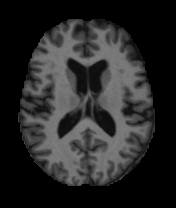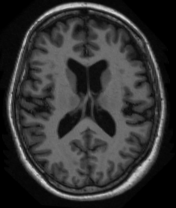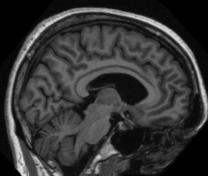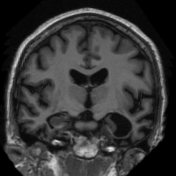

Sources:
Wikipedia.
Ministry of Health-Israel.




####**Importing dataset**




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import scale
from sklearn import decomposition
from sklearn.cluster import DBSCAN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Project/oasis_longitudinal.csv"
alzheimers_data = pd.read_csv(path)

We imported the data and entered it into a dataframe in the name of alzheimers_data.

Lets take a look on the data.


In [ ]:
alzheimers_data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


Now we will try to take a look at the features and understand what each feature means.

- **Subject ID** - `Subject identification`
- **MRI ID** - `MRI Exam Identification`
- **Group** - `Class`
- **Visit** - `Visit Order`
- **MR Delay** - `MR Delay Time (Contrast)`
- **M/F** - `Gender`
- **Hand** - `R: right, L: left`
- **Age** - `Patient age`
- **EDUC** - `Years of Education`
- **SES** - `Socioeconomic Status`
- **MMSE** - `Mini Mental State Examination`
- **CDR** - `Clinical Dementia Rating`
- **eTIV** - `Estimated total intracranial volume`
- **nWBV** - `Normalize Whole Brain Volume`
- **ASF** - `Atlas Scaling Factor`

####**Data preparation**
According to the information on the data brought in by Kaggle, all the patients are right-handed. Even from a superficial view from above it appears that the Hand column only has the value R.

If a column in a data set for a classification problem has the same value in all rows, it does not actually provide useful information for distinguishing between different classes. In other words, this particular feature is constant and does not contribute to variation between different instances or samples. It is impossible to use it to make generalizations about the information that will come later, therefore it has no value and this column can be omitted.

Before we cut of this column we will check if it indeed has only one value, we will verify this in the code. We will check what the distributions are for the Hand feature.

In [ ]:
alzheimers_data['Hand'].value_counts()

R    373
Name: Hand, dtype: int64

We see that it has only one value so we will omit this column:

In [ ]:
alzheimers_data = alzheimers_data.drop(['Hand'], axis=1)


The **MRI ID** column has unique values in each row and therefore has no value because it is not possible to generalize using it and reach a better result. It is like an index of the rows, and the index of the rows is not inserted into the table.

In [ ]:
alzheimers_data['MRI ID'].value_counts()

OAS2_0001_MR1    1
OAS2_0118_MR2    1
OAS2_0122_MR2    1
OAS2_0122_MR1    1
OAS2_0121_MR2    1
                ..
OAS2_0057_MR3    1
OAS2_0057_MR2    1
OAS2_0057_MR1    1
OAS2_0056_MR2    1
OAS2_0186_MR3    1
Name: MRI ID, Length: 373, dtype: int64

Therefore we will omit this column:

In [ ]:
alzheimers_data = alzheimers_data.drop(['MRI ID'], axis=1)

The focus of our classification is on individual tests, as each patient undergoes a test in which constantly changing data is checked, for example:
Mini Mental State Examination (MMSE), and also Estimated total intracranial volume (eTIV).

As a result, historical test data, such as **Subject ID**, **MR Delay**, and **Visit**, become meaningless in this context. These columns are irrelevant because we isolate each test, making visit numbers, patient identities, and time gaps immaterial to the analysis. By omitting these columns, we streamline the classification process to concentrate solely on test-specific relevant features.


Therefore we will omit the  **Subject ID**, **MR Delay** and **Visit** columns:


In [ ]:
alzheimers_data = alzheimers_data.drop(['Subject ID','Visit', 'MR Delay'], axis=1)

In [ ]:
alzheimers_data.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
alzheimers_data['Group'] = alzheimers_data['Group'].replace('Converted', 'Demented')

In [ ]:
alzheimers_data['Group'].value_counts()

Nondemented    190
Demented       183
Name: Group, dtype: int64

#####**Missing values**

In [ ]:
alzheimers_data.isnull().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

We want to get the rows with the missing values

In [ ]:
without_nans = alzheimers_data.dropna()
result = alzheimers_data.merge(without_nans, how='left', indicator=True)
rows_not_in_without_nans = result[result['_merge'] == 'left_only']
rows_not_in_without_nans.drop(columns='_merge')

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
10,Demented,M,71,16,NaN,28.0,0.5,1357,0.748,1.293
11,Demented,M,73,16,NaN,27.0,1.0,1365,0.727,1.286
12,Demented,M,75,16,NaN,27.0,1.0,1372,0.710,1.279
134,Demented,F,80,12,NaN,30.0,0.5,1430,0.737,1.228
135,Demented,F,81,12,NaN,27.0,0.5,1453,0.721,1.208
207,Demented,F,80,12,NaN,27.0,0.5,1475,0.762,1.190
208,Demented,F,83,12,NaN,23.0,0.5,1484,0.750,1.183


There are rows where there are 2 errors, so the number of rows with missing values is 19.
The handling of missing values is either omitting the rows or providing replacement values.
We didn't want to download 19 lines because we only have 373 lines in total, which is quite a large percentage of that.
So we wanted an exchange value
Take a common value

In [ ]:
most_frequent_value = alzheimers_data['SES'].mode()[0]
alzheimers_data['SES'].fillna(most_frequent_value, inplace=True)

most_frequent_value = alzheimers_data['MMSE'].mode()[0]
alzheimers_data['MMSE'].fillna(most_frequent_value, inplace=True)

In [ ]:
alzheimers_data.isnull().sum()

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

Great! We succeeded to fill in the missing values


Summary of data preparation:




-   We omitted unnecessary columns,
-   We changed the soft domain of 'Group'
-   We have assumed missing values
